Saving archive (1).zip to archive (1).zip
Classification Report:

                      precision    recall  f1-score   support

     Billing inquiry       0.18      0.17      0.17       327
Cancellation request       0.18      0.17      0.17       339
     Product inquiry       0.21      0.21      0.21       328
      Refund request       0.21      0.23      0.22       351
     Technical issue       0.20      0.21      0.20       349

            accuracy                           0.20      1694
           macro avg       0.19      0.19      0.19      1694
        weighted avg       0.19      0.20      0.19      1694



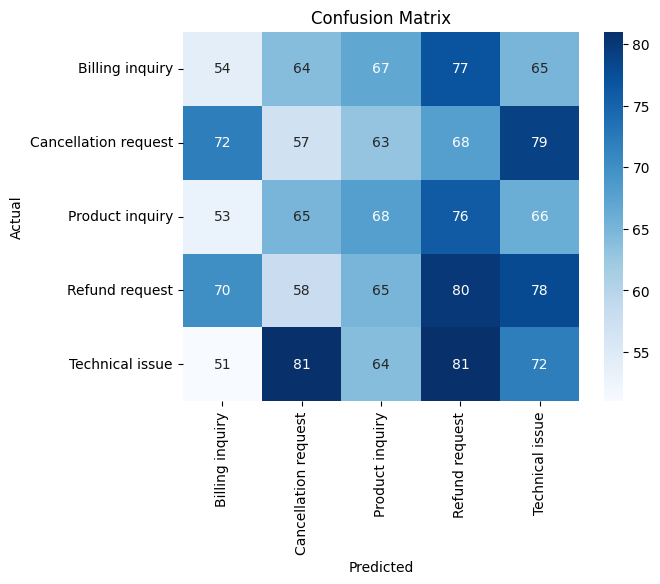

In [1]:
# STEP 1: Upload ZIP File
from google.colab import files
import zipfile
import io
import os

uploaded = files.upload()  # Upload a ZIP file with a CSV inside

# Extract ZIP
zip_filename = next(iter(uploaded))
with zipfile.ZipFile(io.BytesIO(uploaded[zip_filename]), 'r') as zip_ref:
    zip_ref.extractall("data")

# List CSV files
csv_files = [f for f in os.listdir("data") if f.endswith(".csv")]
if not csv_files:
    raise FileNotFoundError("No CSV file found in the ZIP.")
csv_path = os.path.join("data", csv_files[0])

# STEP 2: Load CSV
import pandas as pd

df = pd.read_csv(csv_path)
df = df[['Ticket Description', 'Ticket Type']].dropna()
df.columns = ['text', 'label']  # Rename for consistency

# STEP 3: Clean Text
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['text'] = df['text'].apply(clean_text)

# STEP 4: Split Data
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# STEP 5: Train Model (TF-IDF + Logistic Regression)
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])
pipeline.fit(X_train, y_train)

# STEP 6: Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = pipeline.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=pipeline.classes_,
            yticklabels=pipeline.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
